<a href="https://colab.research.google.com/github/Nando1014/Tidy-Tuesday/blob/master/visualization_deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
from google.colab import files
import io
import scipy.stats as stats


In [3]:
uploaded = files.upload()

Saving games_2015.csv to games_2015.csv
Saving games_attributes_2015.csv to games_attributes_2015.csv
Saving NBA Attendance Modified.csv to NBA Attendance Modified.csv
Saving NBA Team Annual Attendance.csv to NBA Team Annual Attendance.csv


In [4]:
nba_attenance = pd.read_csv(io.BytesIO(uploaded['NBA Team Annual Attendance.csv']))
games_2015 =  pd.read_csv(io.BytesIO(uploaded['games_2015.csv']))
games_atts_2015 =  pd.read_csv(io.BytesIO(uploaded['games_attributes_2015.csv']))

In [5]:
games_2015 =  pd.read_csv(io.BytesIO(uploaded['games_2015.csv']))

In [6]:
games_2015

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,23017,2015-12-31,21500484,Final,1610612754,1610612749,2015,1610612754,116.0,0.500,...,27.0,35.0,1610612749,120.0,0.584,0.686,0.429,18.0,34.0,0
1,23018,2015-12-31,21500486,Final,1610612765,1610612750,2015,1610612765,115.0,0.477,...,24.0,52.0,1610612750,90.0,0.407,0.789,0.357,22.0,36.0,1
2,23019,2015-12-31,21500485,Final,1610612745,1610612744,2015,1610612745,110.0,0.462,...,21.0,33.0,1610612744,114.0,0.512,0.630,0.478,35.0,43.0,0
3,23020,2015-12-31,21500487,Final,1610612740,1610612746,2015,1610612740,89.0,0.439,...,21.0,42.0,1610612746,95.0,0.389,0.789,0.294,24.0,47.0,0
4,23021,2015-12-31,21500488,Final,1610612760,1610612756,2015,1610612760,110.0,0.525,...,29.0,37.0,1610612756,106.0,0.524,0.923,0.400,24.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,24431,2015-01-02,21400492,Final,1610612762,1610612737,2014,1610612762,92.0,0.372,...,18.0,47.0,1610612737,98.0,0.407,0.867,0.261,24.0,47.0,0
1415,24432,2015-01-02,21400493,Final,1610612744,1610612761,2014,1610612744,126.0,0.533,...,35.0,45.0,1610612761,105.0,0.465,0.750,0.400,23.0,37.0,1
1416,24433,2015-01-02,21400494,Final,1610612747,1610612763,2014,1610612747,106.0,0.531,...,24.0,38.0,1610612763,109.0,0.488,0.677,0.429,27.0,46.0,0
1417,24434,2015-01-01,21400482,Final,1610612741,1610612743,2014,1610612741,106.0,0.418,...,22.0,46.0,1610612743,101.0,0.402,0.815,0.357,19.0,57.0,1


In [121]:
games_table =  pd.read_csv(io.BytesIO(uploaded['games_attributes_2015.csv']))
games_table.rename(columns = {'HOME_TEAM_NICKNAME':'Home Team Name', 'VISITOR_TEAM_NICKNAME': 'Visitor Team Name'}, inplace = True)
Teams = games_table[['Home Team Name']]

ft_pct_home_table = games_table.groupby("Home Team Name").mean()
ft_pct_home_table = ft_pct_home_table[['FT_PCT_home']]


ft_pct_away_table = games_table.groupby("Visitor Team Name").mean()
ft_pct_away_table = ft_pct_away_table[['FT_PCT_away']]
ft_pct_away_table['Team'] = ft_pct_away_table.index


ft_pct_away_table = ft_pct_away_table.join(ft_pct_home_table)

df = ft_pct_away_table[["Team", "FT_PCT_home", "FT_PCT_away"]]
df.rename(columns = {'FT_PCT_home':'FT % Home', 'FT_PCT_away': 'FT % Away'}, inplace = True)
df

,Team,FT % Home,FT % Away
Visitor Team Name,,,
76ers,76ers,0.676279,0.690800
Clippers,Clippers,0.693380,0.684585
Rockets,Rockets,0.710464,0.703889
Jazz,Jazz,0.713178,0.732419
Pistons,Pistons,0.716289,0.705064
Lakers,Lakers,0.719795,0.765674
Suns,Suns,0.727208,0.748293
Nets,Nets,0.732674,0.766333
Kings,Kings,0.740762,0.734413


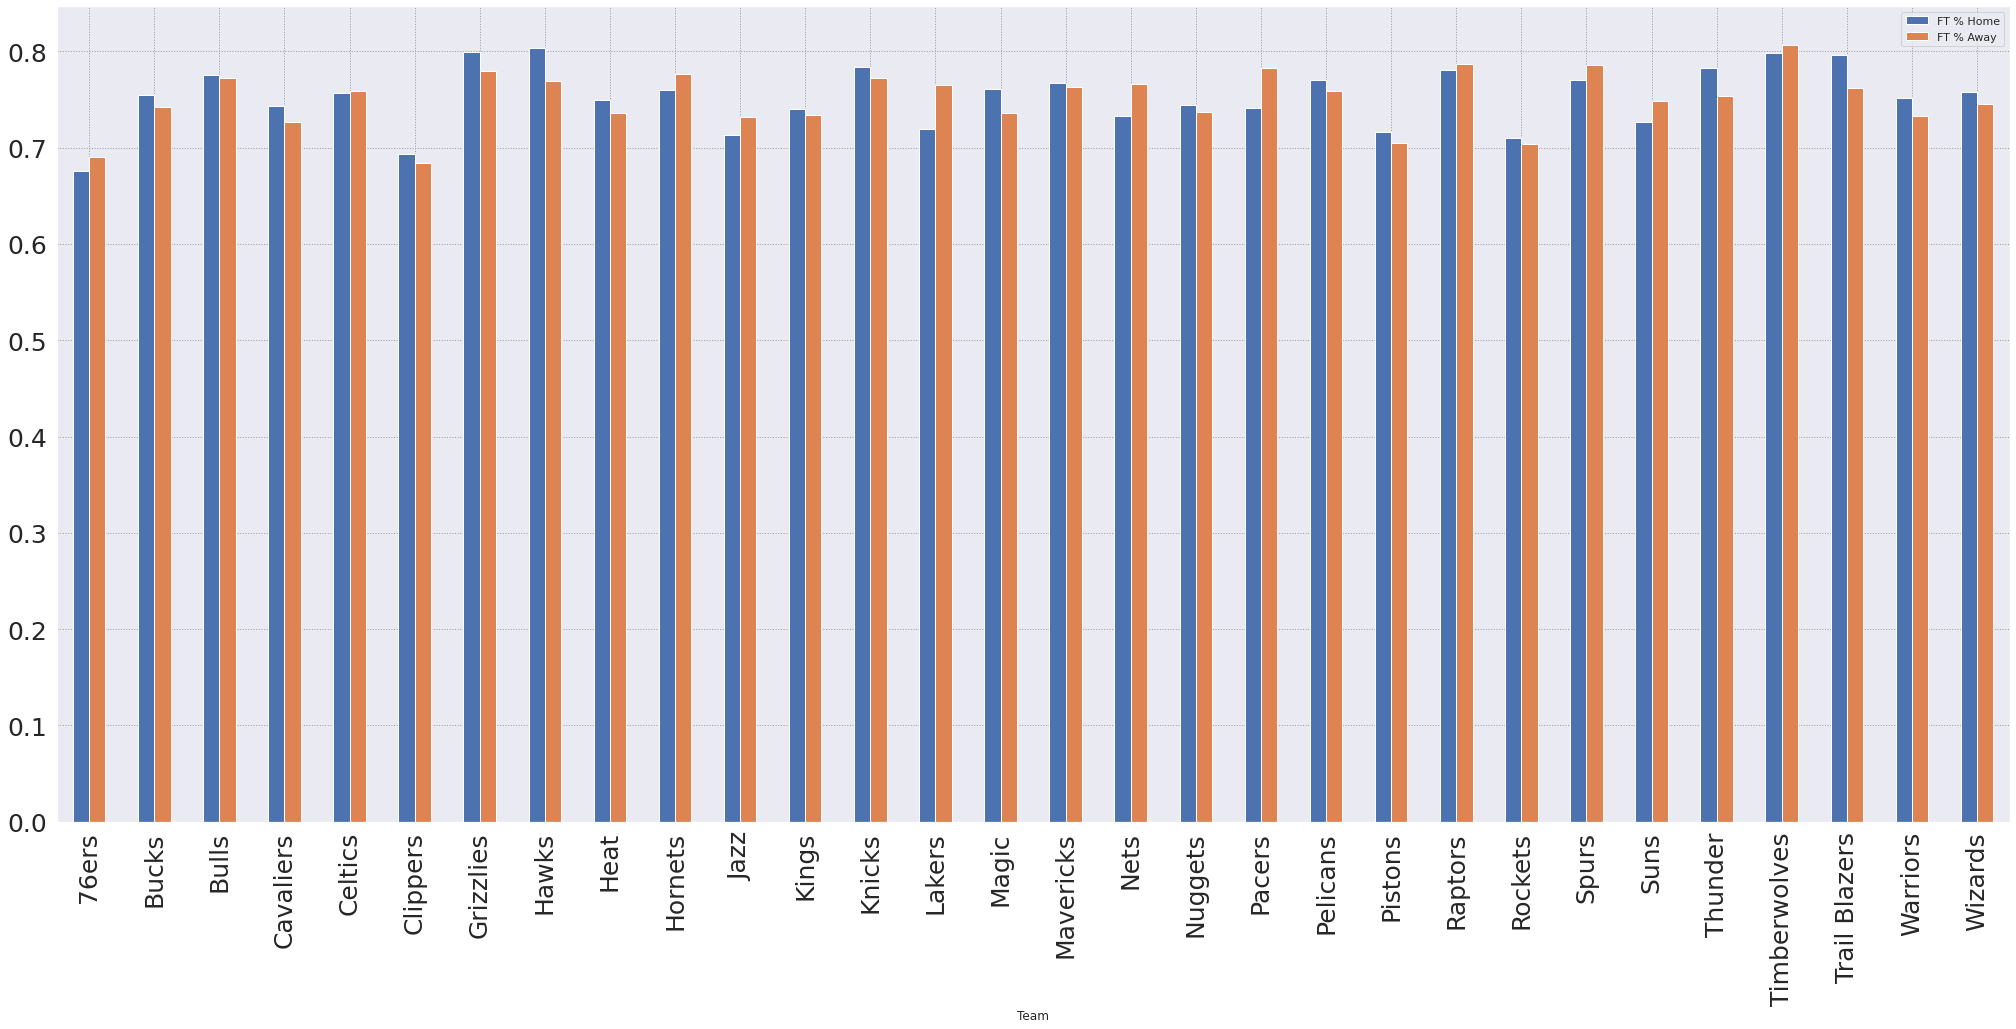

In [112]:
df.plot(x="Team", y=["FT % Home", "FT % Away"], kind="bar", figsize=(35, 15), fontsize = 25, legend=True)

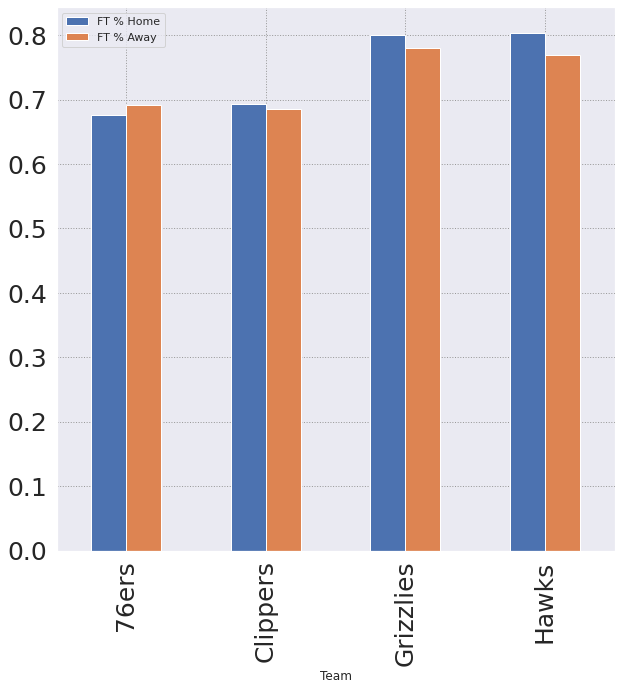

In [122]:
# Highest FT % Home
ft_sorted = df.sort_values('FT % Home')
ft_home =  ft_sorted.iloc[[0,1,-2,-1]]
ft_home
ft_home.plot(x="Team", y=["FT % Home", "FT % Away"], kind="bar", figsize=(10, 10), fontsize = 25, legend=True)

In [162]:
games_table

,Unnamed: 0,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT % Home,FG3_PCT_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,HOME_TEAM_WINS,Home Team Name,Visitor Team Name
0,23017,2015-12-31,21500484,1610612754,1610612749,116.0,0.500,0.808,0.433,120.0,0.584,0.686,0.429,0,Pacers,Bucks
1,23018,2015-12-31,21500486,1610612765,1610612750,115.0,0.477,0.679,0.400,90.0,0.407,0.789,0.357,1,Pistons,Timberwolves
2,23019,2015-12-31,21500485,1610612745,1610612744,110.0,0.462,0.897,0.400,114.0,0.512,0.630,0.478,0,Rockets,Warriors
3,23020,2015-12-31,21500487,1610612740,1610612746,89.0,0.439,0.667,0.280,95.0,0.389,0.789,0.294,0,Pelicans,Clippers
4,23021,2015-12-31,21500488,1610612760,1610612756,110.0,0.525,0.792,0.333,106.0,0.524,0.923,0.400,1,Thunder,Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,24431,2015-01-02,21400492,1610612762,1610612737,92.0,0.372,0.750,0.323,98.0,0.407,0.867,0.261,0,Jazz,Hawks
1415,24432,2015-01-02,21400493,1610612744,1610612761,126.0,0.533,0.800,0.429,105.0,0.465,0.750,0.400,1,Warriors,Raptors
1416,24433,2015-01-02,21400494,1610612747,1610612763,106.0,0.531,0.737,0.316,109.0,0.488,0.677,0.429,0,Lakers,Grizzlies
1417,24434,2015-01-01,21400482,1610612741,1610612743,106.0,0.418,0.880,0.533,101.0,0.402,0.815,0.357,1,Bulls,Nuggets


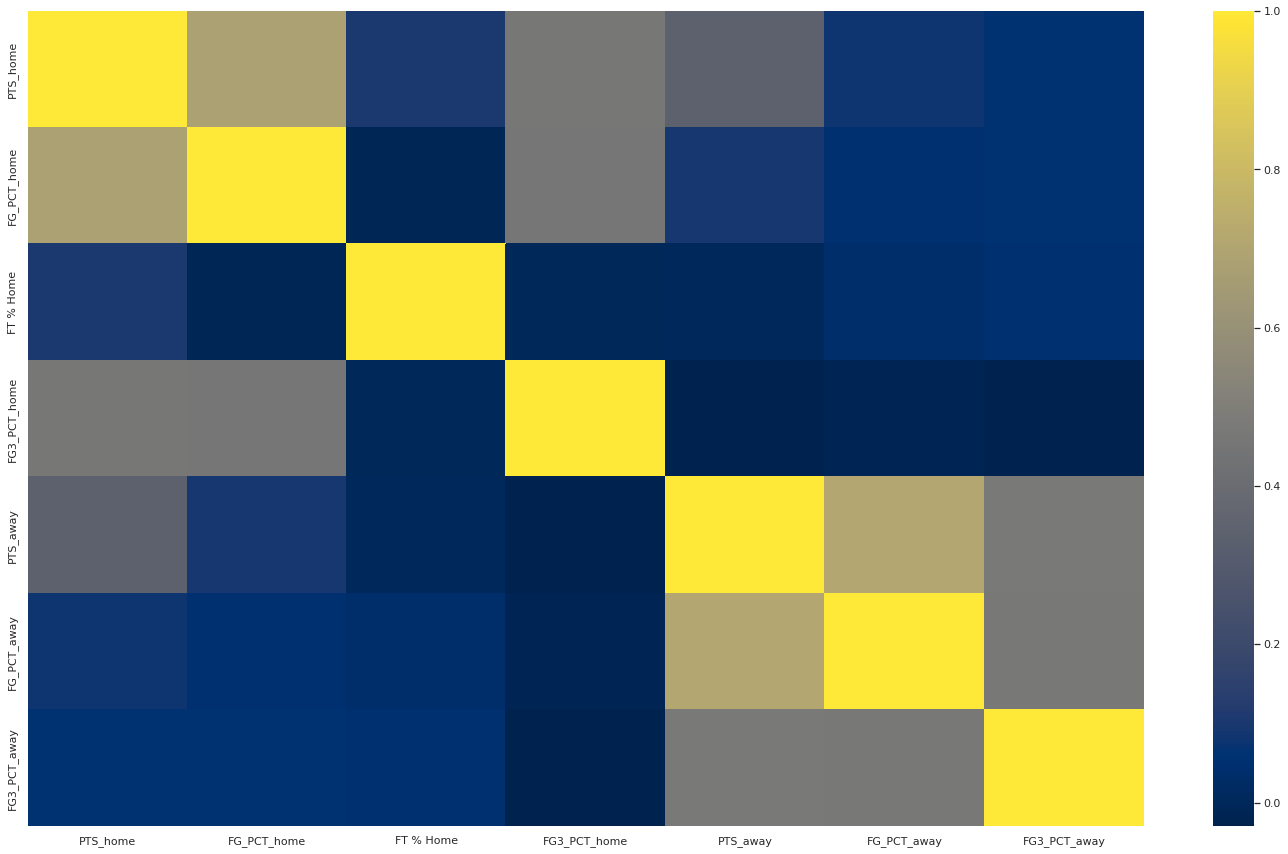

In [176]:
games_table_2 = games_table[["PTS_home", "FG_PCT_home", "FT % Home", "FG3_PCT_home", "PTS_away", "FG_PCT_away", "FG3_PCT_away"]]


fig, ax = plt.subplots(figsize=(25, 15))
sns.set_palette(sns.color_palette("colorblind"))

ax = sns.heatmap(games_table_2.corr(), cmap='cividis')
plt.show()

In [7]:
nba_modified_att =  pd.read_csv(io.BytesIO(uploaded['NBA Attendance Modified.csv']))

In [8]:
nba_modified_att

,Starting Year,Rank,Team,Total Wins,Total Loss,Home Wins,Home Losses,Away Wins,Away Losses,Home: Total Games,Home: Total Attendance,Home: Avg Attendance,Home: % Capactiy,Away: Total Games,Away: Total Attendance,Away: Avg Attendance,Away: % Capactiy
0,2015,1,Bulls,42,40,26,15,16,25,41,"894,659","21,820",104.3,41,"18,156",94.5,82
1,2015,2,Cavaliers,57,25,33,8,24,17,41,"843,042","20,562",100.0,41,"18,910",98.2,82
2,2015,3,Mavericks,42,40,23,18,19,22,41,"825,901","20,143",104.9,41,"17,727",93.4,82
3,2015,4,Raptors,56,26,32,9,24,17,41,"812,863","19,825",100.1,41,"17,162",89.2,82
4,2015,5,NY Knicks,32,50,18,23,14,27,41,"812,292","19,812",100.0,41,"18,440",96.0,82
5,2015,6,Heat,48,34,28,13,20,21,41,"809,350","19,740",100.7,41,"18,044",93.9,82
6,2015,7,Warriors,73,9,39,2,34,7,41,"803,436","19,596",100.0,41,"19,134",100.5,82
7,2015,8,Trail Blazers,44,38,28,13,16,25,41,"794,085","19,367",99.6,41,"17,703",93.3,82
8,2015,9,Jazz,40,42,24,17,16,25,41,"791,489","19,304",97.0,41,"17,378",91.6,82
9,2015,10,Clippers,53,29,29,12,24,17,41,"786,910","19,192",100.7,41,"17,792",93.6,82


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

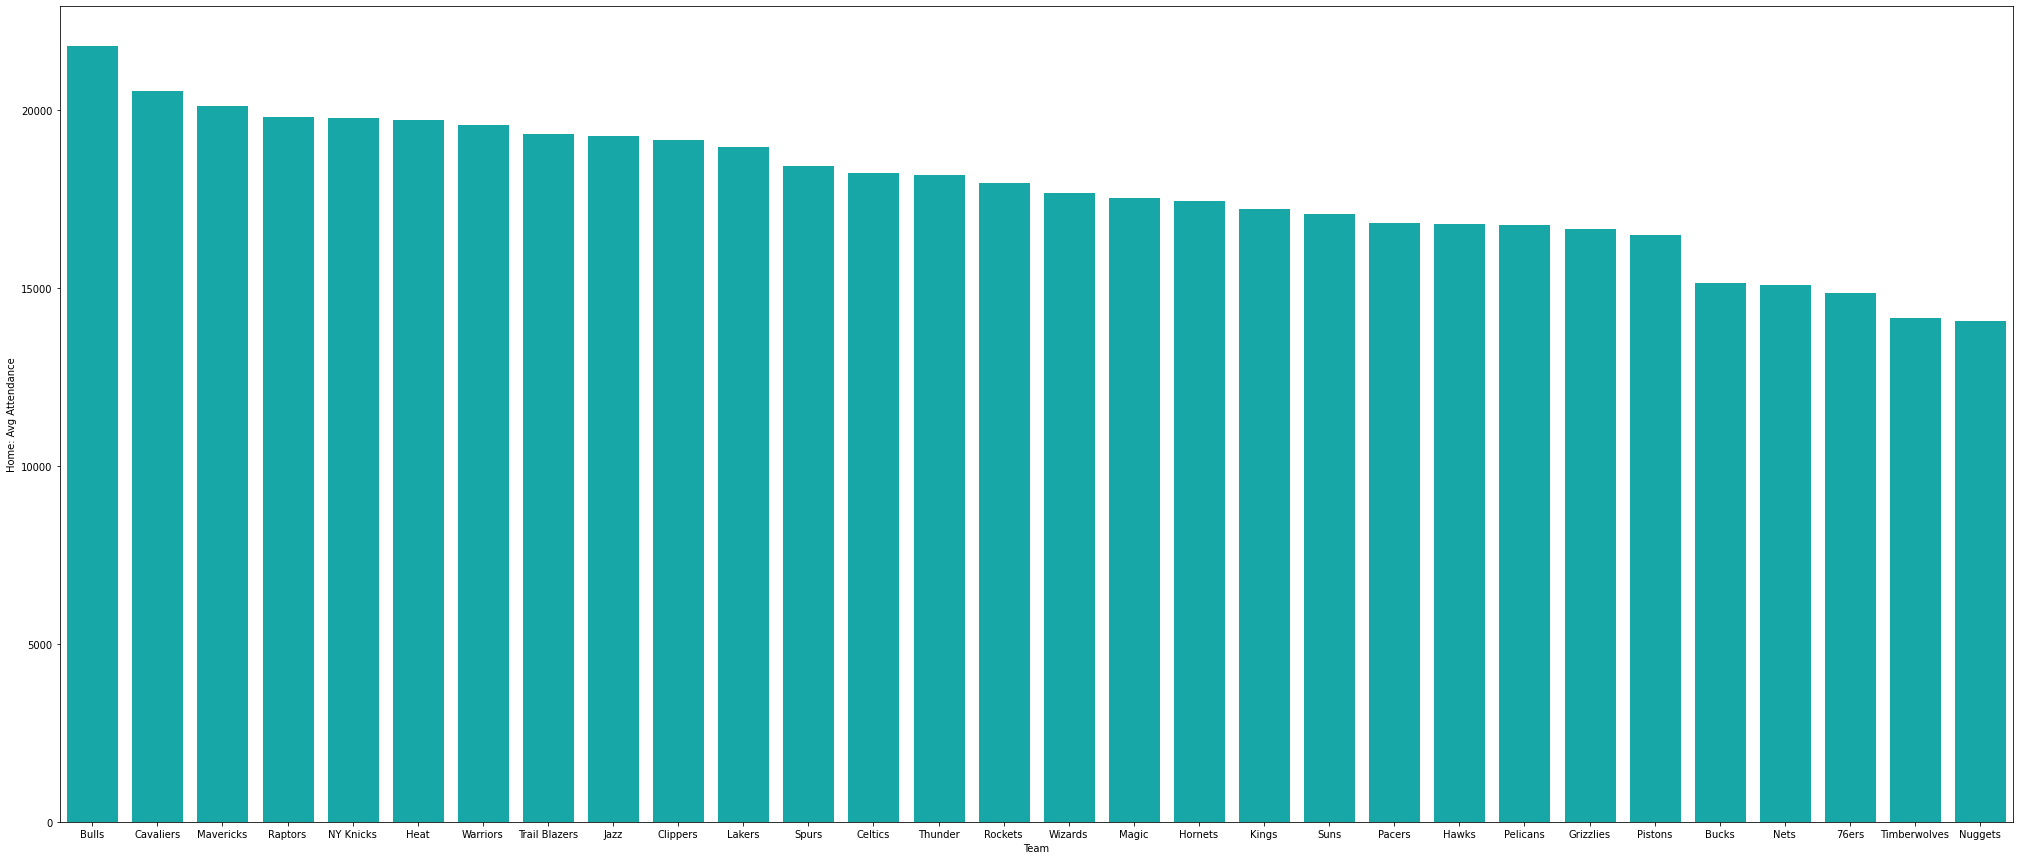

In [10]:
nba_modified_att['Home: Avg Attendance'] = nba_modified_att['Home: Avg Attendance'].str.replace(',', '').astype(float)
f, ax = plt.subplots(figsize=(35, 15))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(x=nba_modified_att["Team"], y=nba_modified_att["Home: Avg Attendance"], label="AVG Home Capacity", color = "c", 
            order=nba_modified_att.sort_values('Home: Avg Attendance', ascending = False).Team)


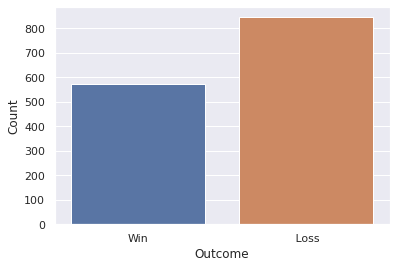

In [11]:
games_2015["HOME_TEAM_WINS"] = games_2015["HOME_TEAM_WINS"].map(lambda x: "Win" if x == 0 else " Loss")
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="HOME_TEAM_WINS", data=games_2015)
ax.set(xlabel='Outcome', ylabel='Count')

plt.show()


In [17]:
data_subset = nba_modified_att[["Team", "Home Wins", "Away Wins"]]
data_subset["Home Win %"] = data_subset["Home Wins"].map(lambda x: x/41)
data_subset["Away Win %"] = data_subset["Away Wins"].map(lambda x: x/41)

data_subset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Team,Home Wins,Away Wins,Home Win %,Away Win %
0,Bulls,26,16,0.634146,0.390244
1,Cavaliers,33,24,0.804878,0.585366
2,Mavericks,23,19,0.560976,0.463415
3,Raptors,32,24,0.780488,0.585366
4,NY Knicks,18,14,0.439024,0.341463
5,Heat,28,20,0.682927,0.487805
6,Warriors,39,34,0.951220,0.829268
7,Trail Blazers,28,16,0.682927,0.390244
8,Jazz,24,16,0.585366,0.390244
9,Clippers,29,24,0.707317,0.585366


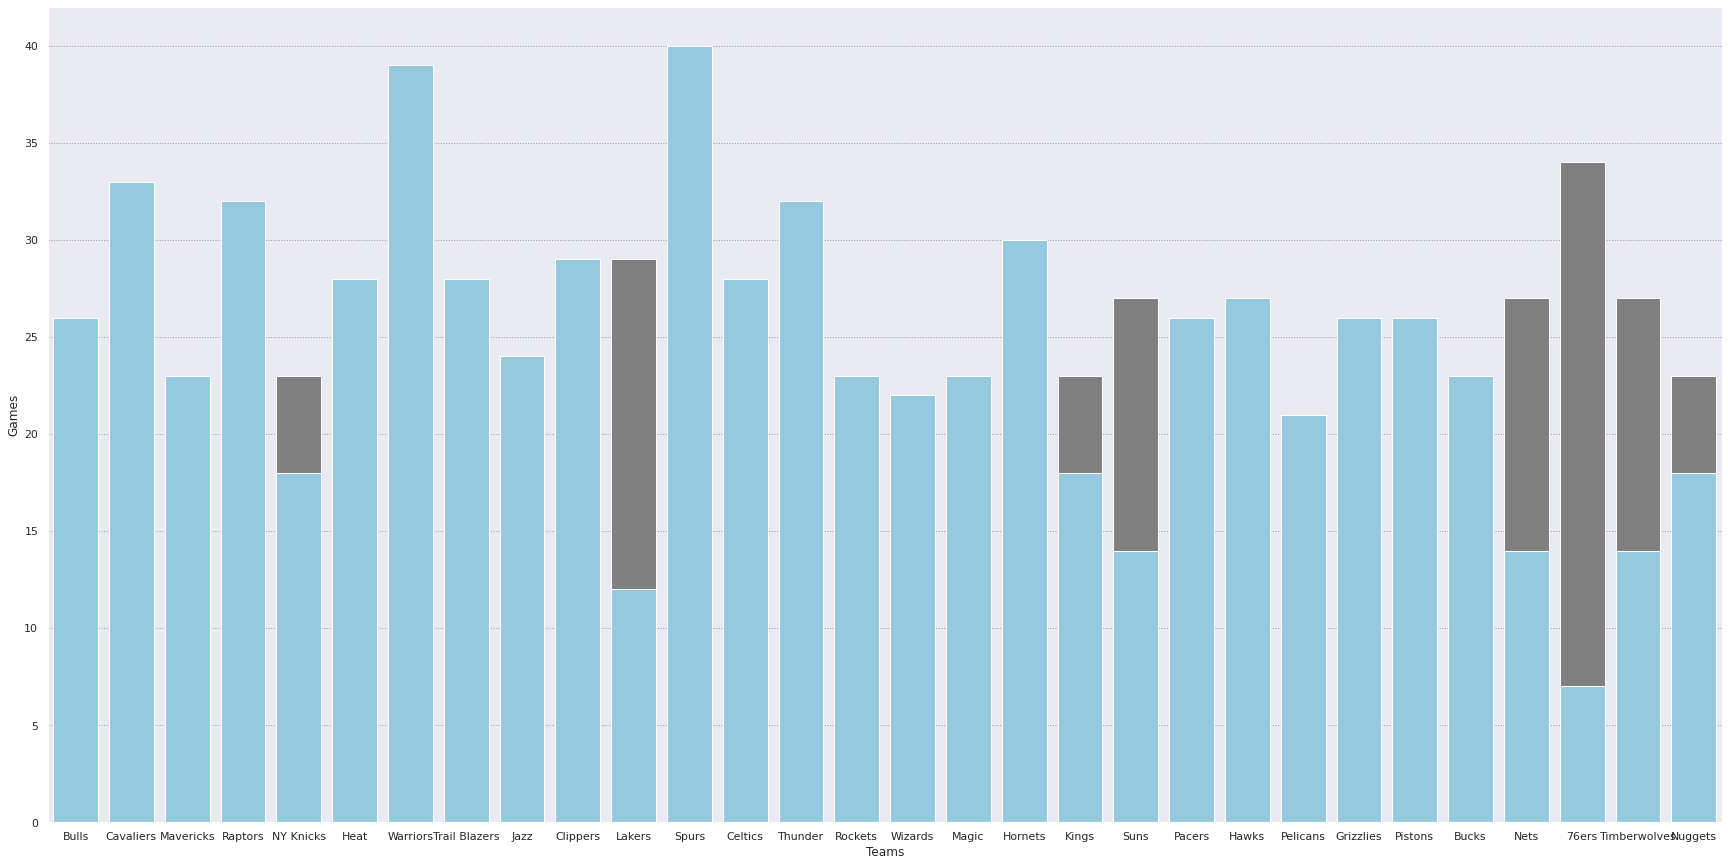

In [20]:
# Subplot tells us which team had more losses than wins at home
ax = plt.subplots(figsize=(30, 15))

#plotting columns
ax=sns.barplot(x=nba_modified_att["Team"] , y = nba_modified_att["Home Losses "],color = 'grey')
ax=sns.barplot(x=nba_modified_att["Team"] , y = nba_modified_att["Home Wins"],color = 'skyblue')
 
#renaming the axes
ax.set(xlabel="Teams", ylabel="Games")
 
# visualizing illustration
plt.show()

Text(0.5, 1.0, 'Home Games (Wins and Losses) 41 Total')

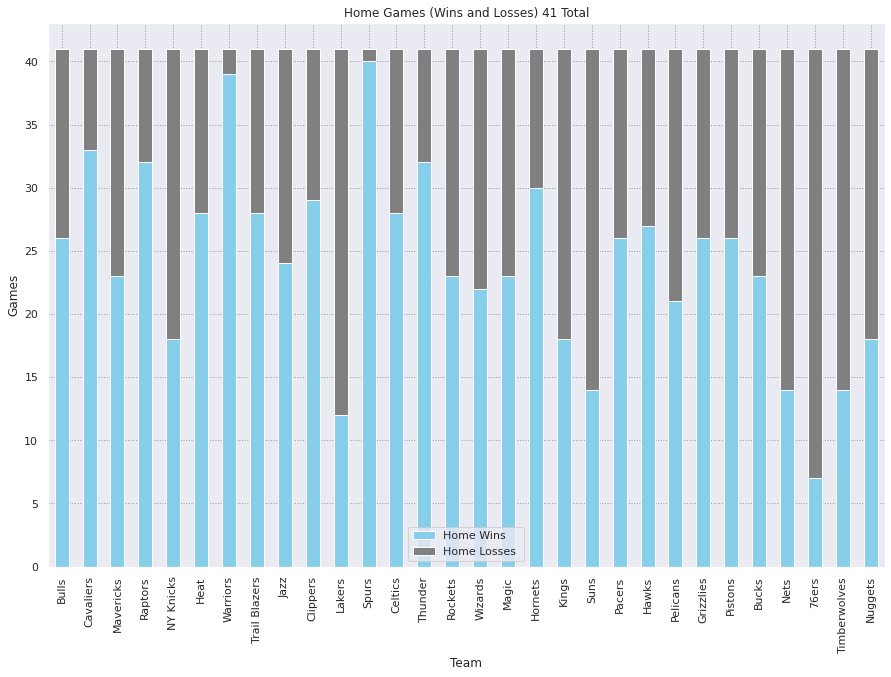

In [21]:
subset = nba_modified_att[["Team", "Home Wins", "Home Losses "]]

# create stacked bar chart for monthly temperatures
subset.set_index('Team').plot(kind='bar', stacked=True, color=['skyblue', 'grey'], figsize=(15, 10))
 
# labels for x & y axis
plt.xlabel('Team')
plt.ylabel('Games')
 
# title of plot
plt.title('Home Games (Wins and Losses) 41 Total')

Text(0.5, 1.0, 'Away Games (Wins and Losses) 41 Total')

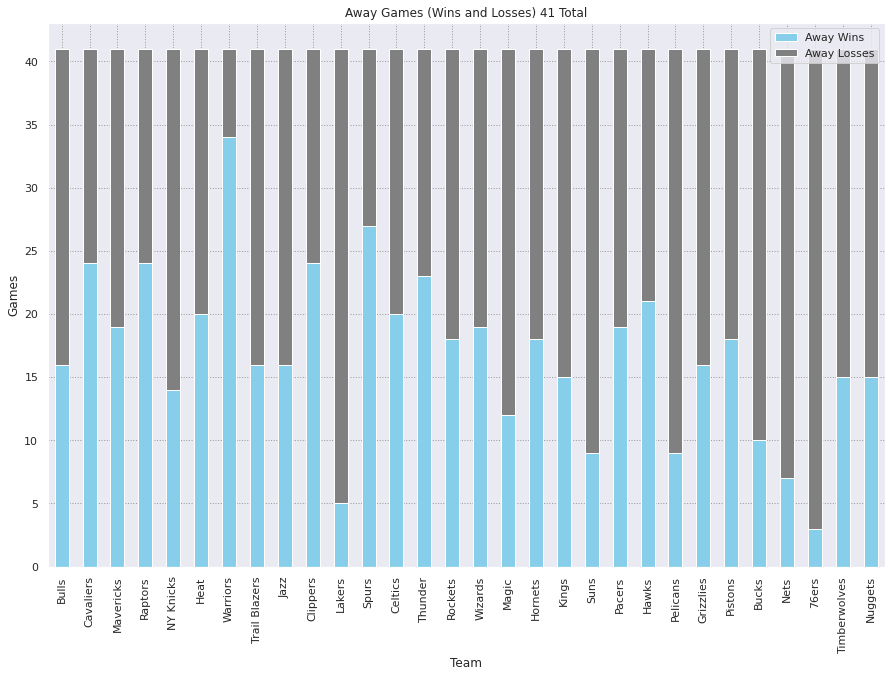

In [22]:
subset = nba_modified_att[["Team", "Away Wins", "Away Losses"]]

# create stacked bar chart for monthly temperatures
subset.set_index('Team').plot(kind='bar', stacked=True, color=['skyblue', 'grey'], figsize=(15, 10))
 
# labels for x & y axis
plt.xlabel('Team')
plt.ylabel('Games')
 
# title of plot
plt.title('Away Games (Wins and Losses) 41 Total')